In [12]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython import display
import numpy as np
from scipy import integrate
# Turn off matplotlib plot in Notebook
plt.ioff()
# Pass the ffmpeg path
#plt.rcParams['animation.ffmpeg_path'] = '/usr/bin/ffmpeg'


In [13]:
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)
fig, ax = plt.subplots()
line, = ax.plot([])
ax.set_xlim(0, 2*np.pi)
ax.set_ylim(-1.1, 1.1)
def animate(frame_num):
    y = np.sin(x + 2*np.pi * frame_num/100)
    line.set_data((x, y))
    return line
anim = FuncAnimation(fig, animate, frames=100, interval=20)
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()



<IPython.core.display.Javascript object>


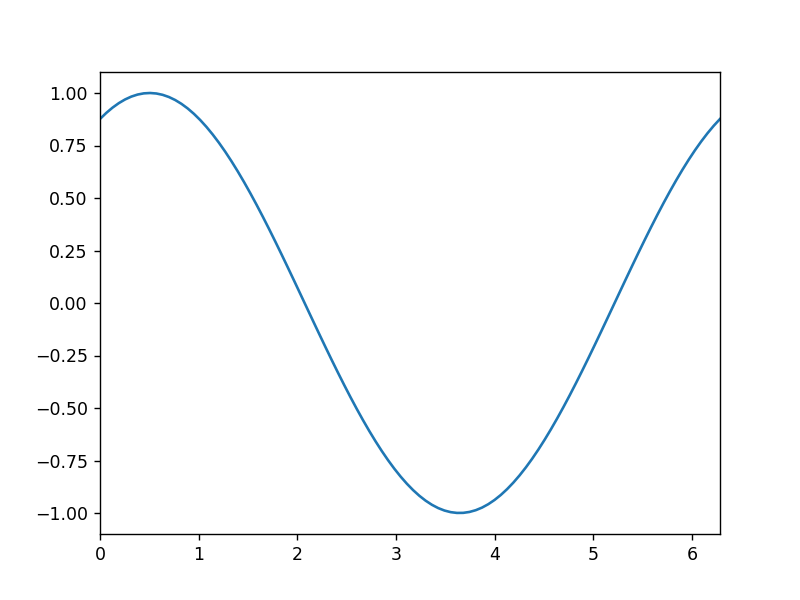

In [14]:


fig, ax = plt.subplots()

line, = ax.plot([])

ax.set_xlim(0, 2*np.pi)
ax.set_ylim(-1.1, 1.1)

def animate(frame_num):
    y = np.sin(x + 2*np.pi * frame_num/100)
    line.set_data((x, y))
    return line

anim = FuncAnimation(fig, animate, frames=100, interval=5)
plt.show()



In [16]:
from attractors import lorentz_deriv,rossler_deriv 
N_trajectories = 12
# Choose random starting points, uniformly distributed from -15 to 15
np.random.seed(1)
x0 = -15 + 30 * np.random.random((N_trajectories, 3))
x02 = np.zeros((N_trajectories*2,3))
x02[::2]=x0
x02[1::2]=x0+0.01*np.random.random((1,3))
x0 = x02
# Solve for the trajectories
tf = np.linspace(0,8.,2000)
x_t = np.asarray([sp.integrate.odeint(lorentz_deriv, x0i, tf)
                  for x0i in x0])

ImportError: cannot import name 'lorentz_deriv' from 'attractors' (/home/juan/.local/lib/python3.8/site-packages/attractors/__init__.py)

In [ ]:
from attractors import lorentz_deriv,rossler_deriv 
N_trajectories = 12
# Choose random starting points, uniformly distributed from -15 to 15
np.random.seed(1)
x0 = -15 + 30 * np.random.random((N_trajectories, 3))
x02 = np.zeros((N_trajectories*2,3))
x02[::2]=x0
x02[1::2]=x0+0.01*np.random.random((1,3))
x0 = x02
# Solve for the trajectories
tf=np.linspace(0,8.,2000.)
x_t = np.asarray([integrate.odeint(lorentz_deriv, x0i, tf)
                  for x0i in x0])
#i=0
#fig1=plt.figure()
#ax1 = fig1.add_subplot(111, projection='3d')
#ax1.plot3D(x_t[0,:,0],x_t[0,:,1],x_t[0,:,2],marker=mk[i],color=ck[i][0],linestyle='')

## Set up figure & 3D axis for animation
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1], projection='3d')
ax.axis('off')

## choose a different color for each trajectory
colors = plt.cm.jet(np.linspace(0, 1, N_trajectories*2))
colors = color.cycle_cmap(12, cmap='viridis')
## set up lines and points
lines = sum([ax.plot([], [], [], '-', c=c)
             for c in colors], [])
pts = sum([ax.plot([], [], [], 'o', c=c) 
           for c in colors], [])

## prepare the axes limits
ax.set_xlim((-25, 25))
ax.set_ylim((-35, 35))
ax.set_zlim((5, 55))

## set point-of-view: specified by (altitude degrees, azimuth degrees)
ax.view_init(30, 0)

# initialization function: plot the background of each frame
def init():
    for line, pt in zip(lines, pts):
        line.set_data([], [])
        line.set_3d_properties([])

        pt.set_data([], [])
        pt.set_3d_properties([])
    return lines + pts

# animation function.  This will be called sequentially with the frame number
def animate(i):
    # we'll step two time-steps per frame.  This leads to nice results.
    i = (2 * i) % x_t.shape[1]

    for line, pt, xi in zip(lines, pts, x_t):
        x, y, z = xi[:i].T
        line.set_data(x, y)
        line.set_3d_properties(z)

        pt.set_data(x[-1:], y[-1:])
        pt.set_3d_properties(z[-1:])

    ax.view_init(30, 0.3 * i)
    fig.canvas.draw()
    return lines + pts

# instantiate the animator.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=750, interval=30, blit=True)

## Save as mp4. This requires mplayer or ffmpeg to be installed
anim.save('lorentz_attractor3.mp4', fps=15, extra_args=['-vcodec', 'libx264'])

plt.show()


In [25]:
from attractors import lorentz_deriv,rossler_deriv 
mk=np.tile(markers.MarkerStyle.filled_markers,3)
ck=list(six.iteritems(colors.cnames))
from mpltools import color
N_trajectories = 12

ImportError: cannot import name 'lorentz_deriv' from 'attractors' (/home/juan/.local/lib/python3.8/site-packages/attractors/__init__.py)

In [27]:
from attractors import Attractor
import numpy as np

n = 3
a = "rossler"
simtime = 100
simpoints = simtime * 100

# Create a list of n attractor instances
attrs = [Attractor(a) for _ in range(n)]

# Change the initial coordinates randomly for n-1 objects
for attr in attrs[1:]:
    attr.coord += np.random.normal(0, 0.01, size=3)

# Solve the ODE equations and store the generators
objs = []
for a in attrs:
    func = getattr(a, "rk3")
    objs.append(func(0, simtime, simpoints))

# Use plot_multipoint with necessary kwargs
ax = Attractor.plot_multipoint(simpoints - 1,*objs,dpi=240,bgcolor="#FFFFFF",
                               palette=["#616161", "#7a7a7a", "#2e2e2e", "#1c1c1c"],
                               linekwargs={"linewidth": 0.5, "alpha": 0.7},
                               pointkwargs={"markersize": 1})

TypeError: 'int' object is not iterable